In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
def hill_activation(x, K, n, ymin, ymax):
    
    return ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def hill_activation_simple(x, K, n):
    
    return (x**n / (K**n + x**n))

def read_datasets(folder):
    
    names = ['fluos', 'ods', 'fluos-lower-1', 'fluos-lower-2']
    datasets = []
    for name in names:
        datasets.append(pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, name), index_col='time'))
    return datasets

def get_control(fluos, h):
    
    idx = 3 * h
    gfp = fluos[filter(lambda x: x.startswith('positive-control-amp'), fluos.columns)].mean(axis=1)
    neg_amp = fluos[filter(lambda x: x.startswith('negative-control-amp'), fluos.columns)].mean(axis=1)
    neg_kan = fluos[filter(lambda x: x.startswith('negative-control-kan'), fluos.columns)].mean(axis=1)
    neg_kan_10, gfp_10, neg_amp_10 = neg_kan.iloc[idx], gfp.iloc[idx], neg_amp.iloc[idx]
    return neg_kan_10, gfp_10, neg_amp_10

def convert_rpu(fluos, ctrl):
    
    return (fluos - ctrl[0])/(ctrl[1] - ctrl[2])

In [30]:
ecfs = ['e16x33', 'e41x33']
gates = ['e16x33NrdA2', 'e41x32NrdJ1']
#cumas_rpu = [5.160308727625551e-22, 0.1503530957891216, 0.30298032564481925, 0.5678111055145855, 0.9488899036690079, 1.371938809116961]
#aras_rpu = [0.018662727197652017, 3.178003346532333, 12.947615590104748, 16.501814366047896, 16.823954625777105, 16.846887772258317]

In [31]:
folder = '024-pCympBAD-E16-41'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

In [60]:
def plot_heatmap(fluos, gates, num_row, num_col, row_lbl, col_lbl):
    
    f, axs = plt.subplots(num_row, num_col, sharex=False, sharey=False, figsize=(18, num_row*3))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(gates):
            gate = gates[i]
            fluo = fluos[filter(lambda x: x.startswith(gate), fluos.index)]
            fluo_t = fluo.reset_index().rename(columns={'index': 'gate'})
            fluo_t['cuma'] = fluo_t['gate'].str[-2]
            fluo_t['ara'] = fluo_t['gate'].str[-1]
            fluo_pvt = fluo_t.drop('gate', axis=1).pivot('cuma', 'ara')
            fluo_pvt.index = row_lbl
            fluo_pvt.columns = col_lbl
            sns.heatmap(fluo_pvt, annot=True, fmt='.2f', ax=ax, cmap='cividis')
            ax.set_xlabel('Sal')
            ax.set_ylabel('AHL')
            ax.set_title(gate)
        else:
            ax.set_visible(False)
    plt.tight_layout()
    plt.show()
    
#plot_heatmap(fluos_rpu.iloc[30], gates, 1, 2, np.round(aras_rpu, 2), np.round(cumas_rpu, 2))

In [58]:
aras_rpu = [0.016371822448534235, 0.10129783845740496, 0.5938269471580947, 2.6617291185039744, 6.022366723674042, 7.543994698752634]
cumas_rpu = [0.021875582902283607, 0.11662623217219029, 0.5921268964337124, 2.42583007362859, 5.696489596328492, 7.5950206097534565]

In [55]:
ecfs = ['e41x33', 'e42x32']
gates = ['e41x32NrdJ1', 'e42x32STIMPDH1']

In [56]:
folder = '026-pLuxpSal-E41-42'
fluos, ods, fluos_1, fluos_2 = read_datasets(folder)
fluos_rpu = convert_rpu(fluos_2, get_control(fluos_2, 10))

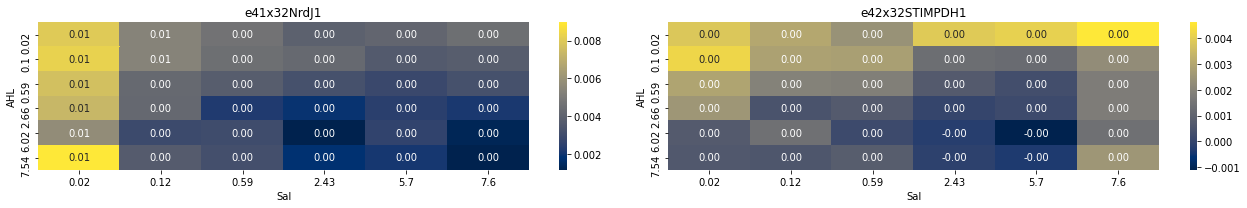

In [61]:
plot_heatmap(fluos_rpu.iloc[30], gates, 1, 2, np.round(aras_rpu, 2), np.round(cumas_rpu, 2))